# Análisis de Atletas Olímpicos

Este proyecto analiza datos históricos de atletas olímpicos para explorar tendencias, patrones y estadísticas relevantes a lo largo de la historia de los Juegos Olímpicos.

In [108]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import scipy.stats as stats

# Seleccionamos un tamaño de letra que se pueda leer.
matplotlib.rcParams.update({'font.size': 14})

In [109]:
# Hacer que los gráficos de matplotlib tengan
# una resolución decente en Jupyter:
%config InlineBackend.figure_format = 'retina'

Para este análisis vamos a utilizar el dataset [120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). En donde se almacena un histórico de los resultados que han obtenido los atletas que han participado en las olimpiadas.

In [110]:
# Cargamos el csv en Pandas.
athlete_df = pd.read_csv("./athlete_events.csv")

# Mostramos una muestra.
athlete_df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
86143,43684,Guilherme Augusto Guido,M,21.0,194.0,90.000000,Brazil,BRA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 4 x 100 metres Medley Relay,NaN
235334,118014,Daisaku Takeda,M,26.0,178.0,73.000000,Japan,JPN,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Double Sculls,NaN
40990,21121,Chon Chol-Ho,M,23.0,NaN,77.333333,North Korea,PRK,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Light-Heavyweight,NaN
209658,105275,Brit Sandaune,F,24.0,172.0,65.000000,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
223681,112346,Malcolm Smith,M,37.0,NaN,NaN,Bermuda,BER,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Mixed One Person Dinghy,NaN


# Ejercicio 1
¿Qué edad suelen tener los atletas olímpicos?

In [111]:
athlete_df['Age'].describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

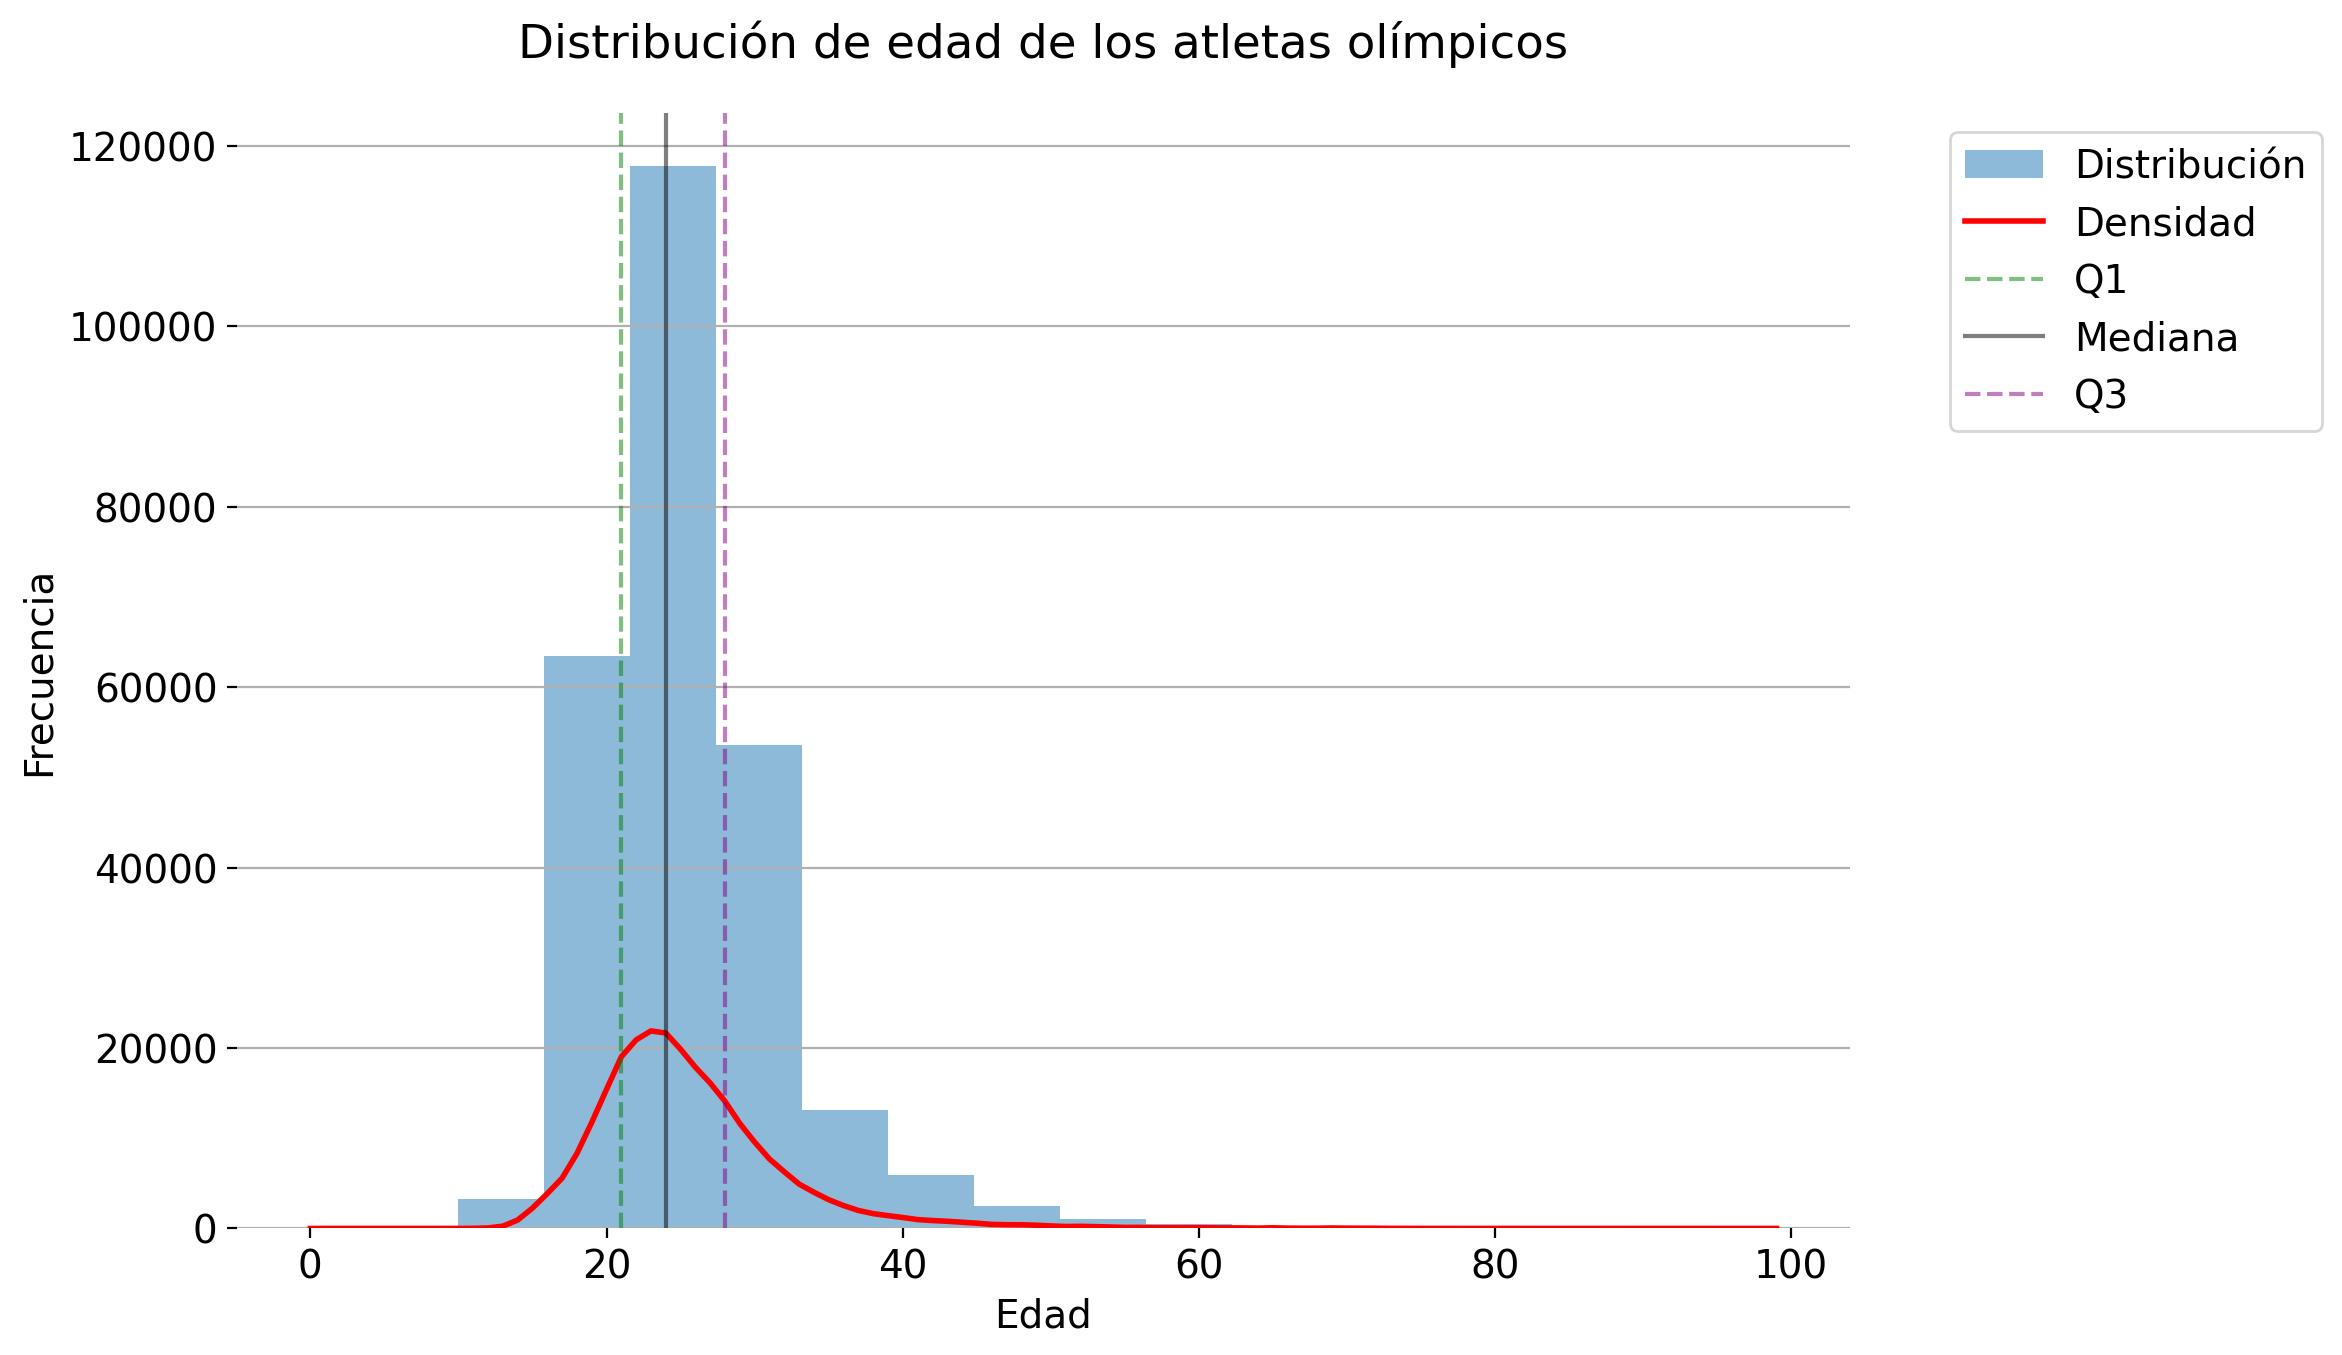

In [112]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.hist(athlete_df['Age'].dropna(), bins=15, alpha=0.5, label='Distribución')

age_density = stats.gaussian_kde(athlete_df['Age'].dropna())
x = np.arange(0, 100, 1)
y = age_density(x)
y = y * len(athlete_df['Age'].dropna())  # Reescalamos para que coincida con el histograma
ax.plot(x, y, 'r-', linewidth=2, label='Densidad')

q1 = athlete_df['Age'].quantile(0.25)
median = athlete_df['Age'].median()
q3 = athlete_df['Age'].quantile(0.75)

ax.axvline(q1, color='green', linestyle='--', alpha=0.5, label='Q1')
ax.axvline(median, color='black', linestyle='-', alpha=0.5, label='Mediana')
ax.axvline(q3, color='purple', linestyle='--', alpha=0.5, label='Q3')

ax.grid(True, axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de edad de los atletas olímpicos', pad=20)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Ejercicio 2
Nos gustaría conocer los países que han ganado más medallas a lo largo de la historia. Además, querríamos saber cuantas han sido en juegos de invierno y cuantas en juegos de verano.

In [113]:
#  pivot_table
medals_by_season = pd.pivot_table(
    athlete_df,
    values='Medal',
    index='Team',
    columns='Season',
    aggfunc='count',
    fill_value=0
).reset_index()

medals_by_season



Season,Team,Summer,Winter
0,30. Februar,0,0
1,A North American Team,4,0
2,Acipactli,0,0
3,Acturus,0,0
4,Afghanistan,2,0
...,...,...,...
1179,Zambia,2,0
1180,Zefyros,0,0
1181,Zimbabwe,22,0
1182,Zut,3,0


In [114]:
medals_by_season['Total'] = medals_by_season['Winter'] + medals_by_season['Summer']
medals_by_season = medals_by_season.sort_values('Total', ascending=False)

medals_by_season.head(10)

Season,Team,Summer,Winter,Total
1095,United States,4686,533,5219
976,Soviet Union,2061,390,2451
398,Germany,1687,297,1984
412,Great Britain,1598,75,1673
361,France,1408,142,1550
506,Italy,1384,143,1527
1010,Sweden,1006,428,1434
65,Australia,1290,16,1306
173,Canada,668,575,1243
476,Hungary,1123,4,1127


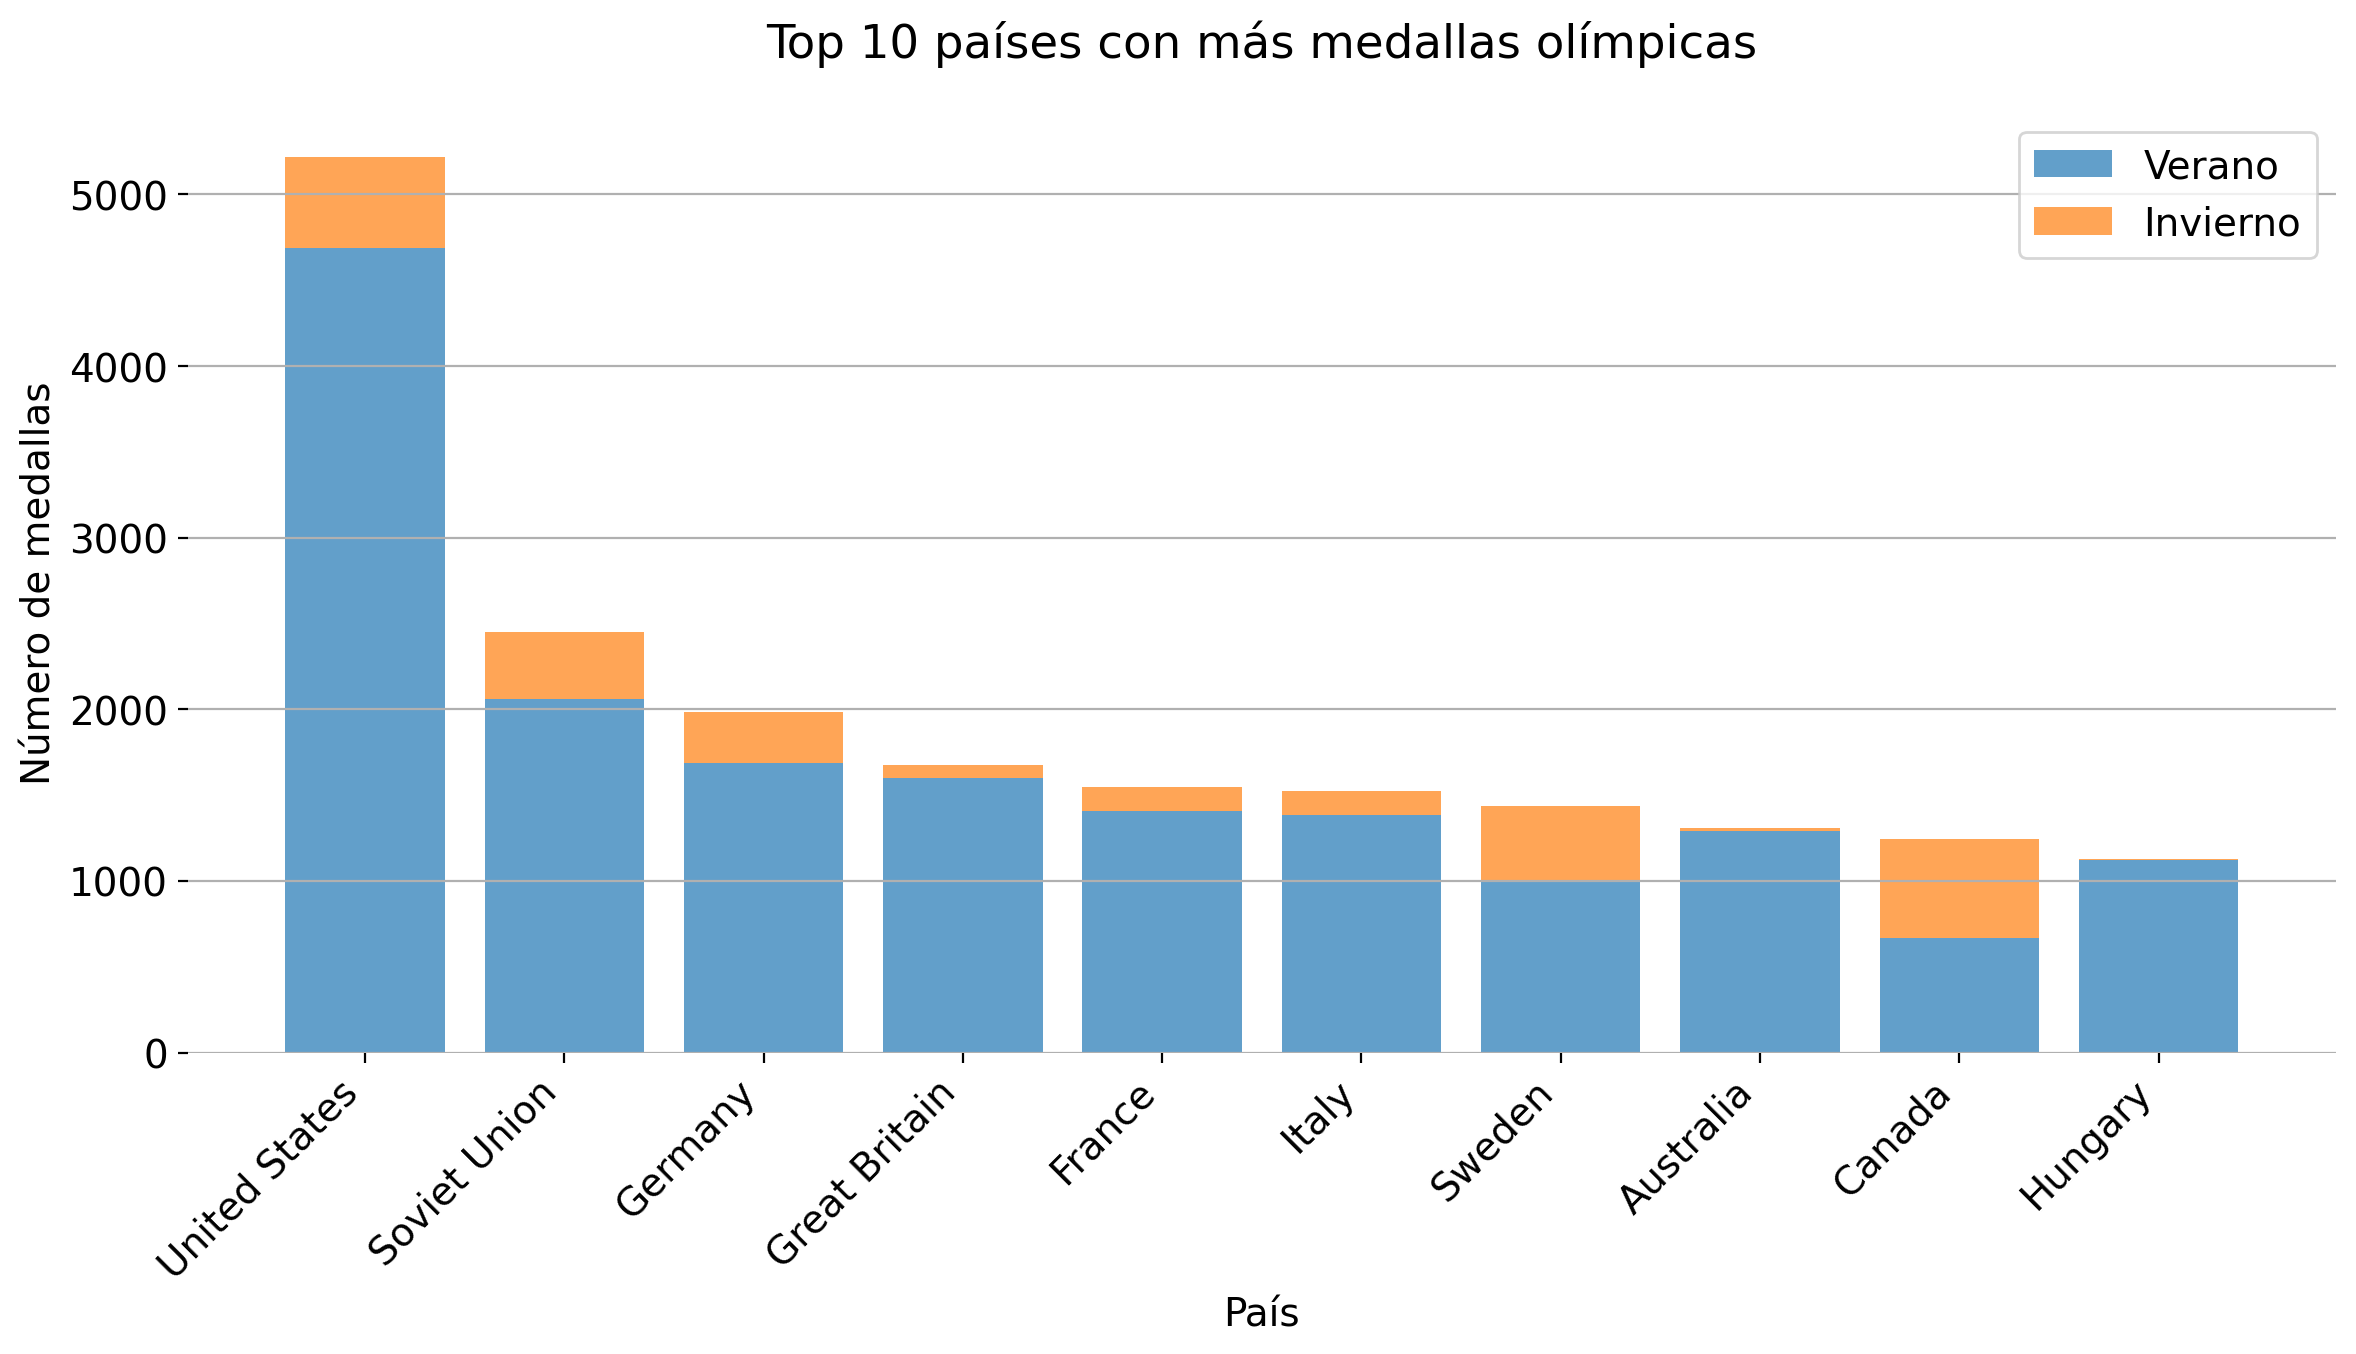

In [115]:
# top 10 países
top_10_countries = medals_by_season.head(10)

fig, ax = plt.subplots(figsize=(12, 7))

ax.bar(top_10_countries['Team'], top_10_countries['Summer'], 
       label='Verano', alpha=0.7)
ax.bar(top_10_countries['Team'], top_10_countries['Winter'], 
       bottom=top_10_countries['Summer'], label='Invierno', alpha=0.7)

ax.grid(True, axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xticks(rotation=45, ha='right')

ax.set_xlabel('País')
ax.set_ylabel('Número de medallas')
ax.set_title('Top 10 países con más medallas olímpicas', pad=20)

ax.legend()

plt.tight_layout()

# Ejercicio 3
Nos gustaría conocer en qué deportes son más pesados los atletas y, además, cuanto suelen pesar los hombres y las mujeres que compiten en esos deportes.

In [116]:
weight_by_sport = athlete_df.groupby(['Sport', 'Sex'])['Weight'].agg(['mean', 'count']).reset_index()
weight_by_sport

,Sport,Sex,mean,count
0,Aeronautics,M,NaN,0
1,Alpine Skiing,F,62.640307,2605
2,Alpine Skiing,M,78.626035,3745
3,Alpinism,F,NaN,0
4,Alpinism,M,NaN,0
...,...,...,...,...
111,Water Polo,M,87.706172,2236
112,Weightlifting,F,67.724622,463
113,Weightlifting,M,80.251796,3340
114,Wrestling,F,60.554455,303


In [117]:
# Filtramos para tener solo deportes con suficientes atletas (por ejemplo, más de 100)
min_athletes = 100
valid_sports = weight_by_sport.groupby('Sport')['count'].sum() >= min_athletes
valid_sports = valid_sports[valid_sports].index
valid_sports

Index(['Alpine Skiing', 'Archery', 'Athletics', 'Badminton', 'Baseball',
       'Basketball', 'Beach Volleyball', 'Biathlon', 'Bobsleigh', 'Boxing',
       'Canoeing', 'Cross Country Skiing', 'Curling', 'Cycling', 'Diving',
       'Equestrianism', 'Fencing', 'Figure Skating', 'Football',
       'Freestyle Skiing', 'Golf', 'Gymnastics', 'Handball', 'Hockey',
       'Ice Hockey', 'Judo', 'Luge', 'Modern Pentathlon', 'Nordic Combined',
       'Rhythmic Gymnastics', 'Rowing', 'Rugby Sevens', 'Sailing', 'Shooting',
       'Short Track Speed Skating', 'Skeleton', 'Ski Jumping', 'Snowboarding',
       'Softball', 'Speed Skating', 'Swimming', 'Synchronized Swimming',
       'Table Tennis', 'Taekwondo', 'Tennis', 'Trampolining', 'Triathlon',
       'Volleyball', 'Water Polo', 'Weightlifting', 'Wrestling'],
      dtype='object', name='Sport')

In [118]:
weight_by_sport_filtered = weight_by_sport[weight_by_sport['Sport'].isin(valid_sports)]
weight_pivot = weight_by_sport_filtered.pivot(
    index='Sport', 
    columns='Sex', 
    values='mean'
).reset_index()

weight_pivot

Sex,Sport,F,M
0,Alpine Skiing,62.640307,78.626035
1,Archery,62.013575,77.066866
2,Athletics,60.239798,73.839129
3,Badminton,61.586364,74.362536
4,Baseball,NaN,85.707792
5,Basketball,73.685170,91.683529
6,Beach Volleyball,68.350943,89.512821
7,Biathlon,57.306586,72.632123
8,Bobsleigh,72.804196,90.387385
9,Boxing,61.836066,65.296280


In [119]:
# Ordenamos por el peso promedio total (M + F) / 2
weight_pivot['avg_weight'] = (weight_pivot['M'].fillna(0) + weight_pivot['F'].fillna(0)) / 2
weight_pivot_sorted = weight_pivot.sort_values('avg_weight', ascending=True).tail(15)
weight_pivot_sorted

Sex,Sport,F,M,avg_weight
35,Skeleton,61.000000,82.018349,71.509174
12,Curling,62.888350,81.465686,72.177018
10,Canoeing,64.878906,79.972378,72.425642
26,Luge,66.908832,80.803311,73.856071
49,Weightlifting,67.724622,80.251796,73.988209
24,Ice Hockey,65.712865,83.775593,74.744229
25,Judo,67.067164,83.573945,75.320555
30,Rowing,70.102214,83.665663,76.883938
47,Volleyball,69.333779,86.925926,78.129853
31,Rugby Sevens,66.628378,91.006623,78.817500


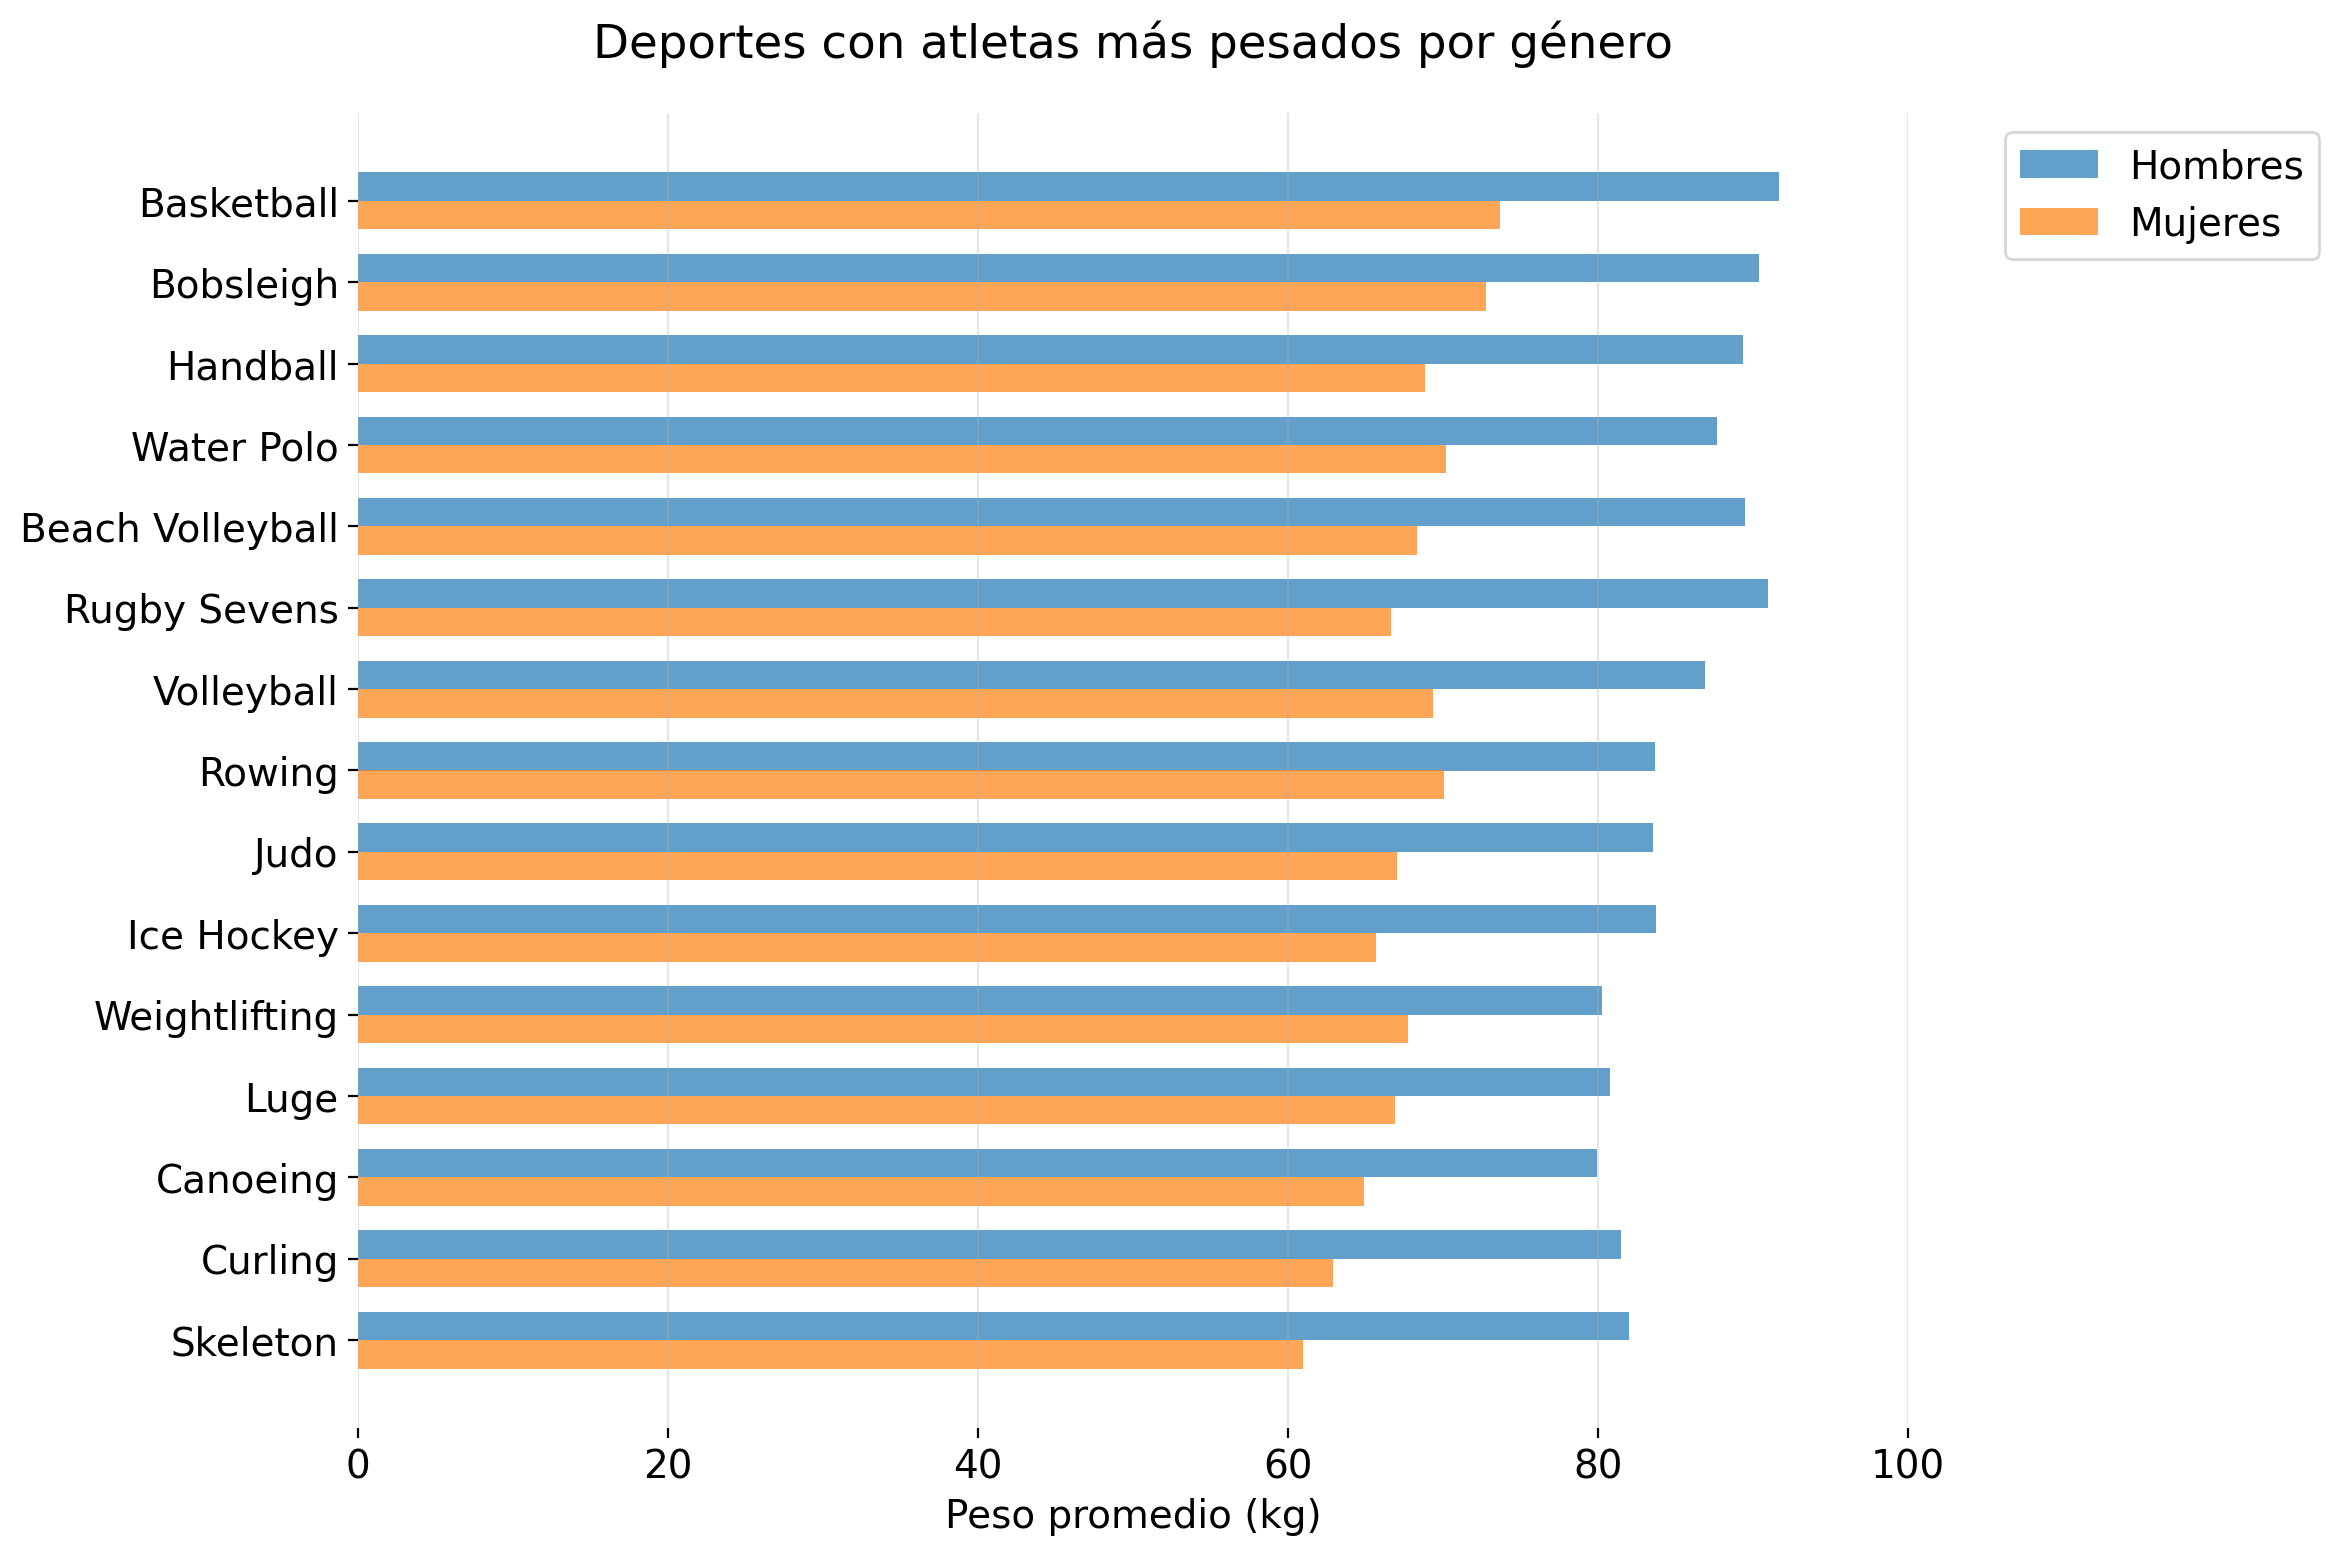

In [120]:
fig, ax = plt.subplots(figsize=(12, 8))

width = 0.35
x = np.arange(len(weight_pivot_sorted))

ax.barh(x + width/2, weight_pivot_sorted['M'], width, label='Hombres', alpha=0.7)
ax.barh(x - width/2, weight_pivot_sorted['F'], width, label='Mujeres', alpha=0.7)

ax.grid(True, axis='x', alpha=0.3)  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

max_weight = max(weight_pivot_sorted['M'].max(), weight_pivot_sorted['F'].max())
ax.set_xlim(0, math.ceil(max_weight / 10) * 10)  # Redondeamos al siguiente múltiplo de 10

ax.set_xlabel('Peso promedio (kg)')
ax.set_title('Deportes con atletas más pesados por género', pad=20)

ax.set_yticks(x)
ax.set_yticklabels(weight_pivot_sorted['Sport'])

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Ejercicio 4
Nos gustaría saber si son más populares los juegos olimpicos de invierno o de verano. Es decir, participan más atletas en los juegos olímpicos de verano o en los de inviernos. Y si son estas participaciones uniformes.

In [121]:
participants_by_year = athlete_df.groupby(['Year', 'Season']).size().reset_index(name='Participants')

participants_by_year_sorted = participants_by_year.sort_values(by="Year")
participants_by_year_sorted

,Year,Season,Participants
0,1896,Summer,380
1,1900,Summer,1936
2,1904,Summer,1301
3,1906,Summer,1733
4,1908,Summer,3101
5,1912,Summer,4040
6,1920,Summer,4292
7,1924,Summer,5233
8,1924,Winter,460
9,1928,Summer,4992


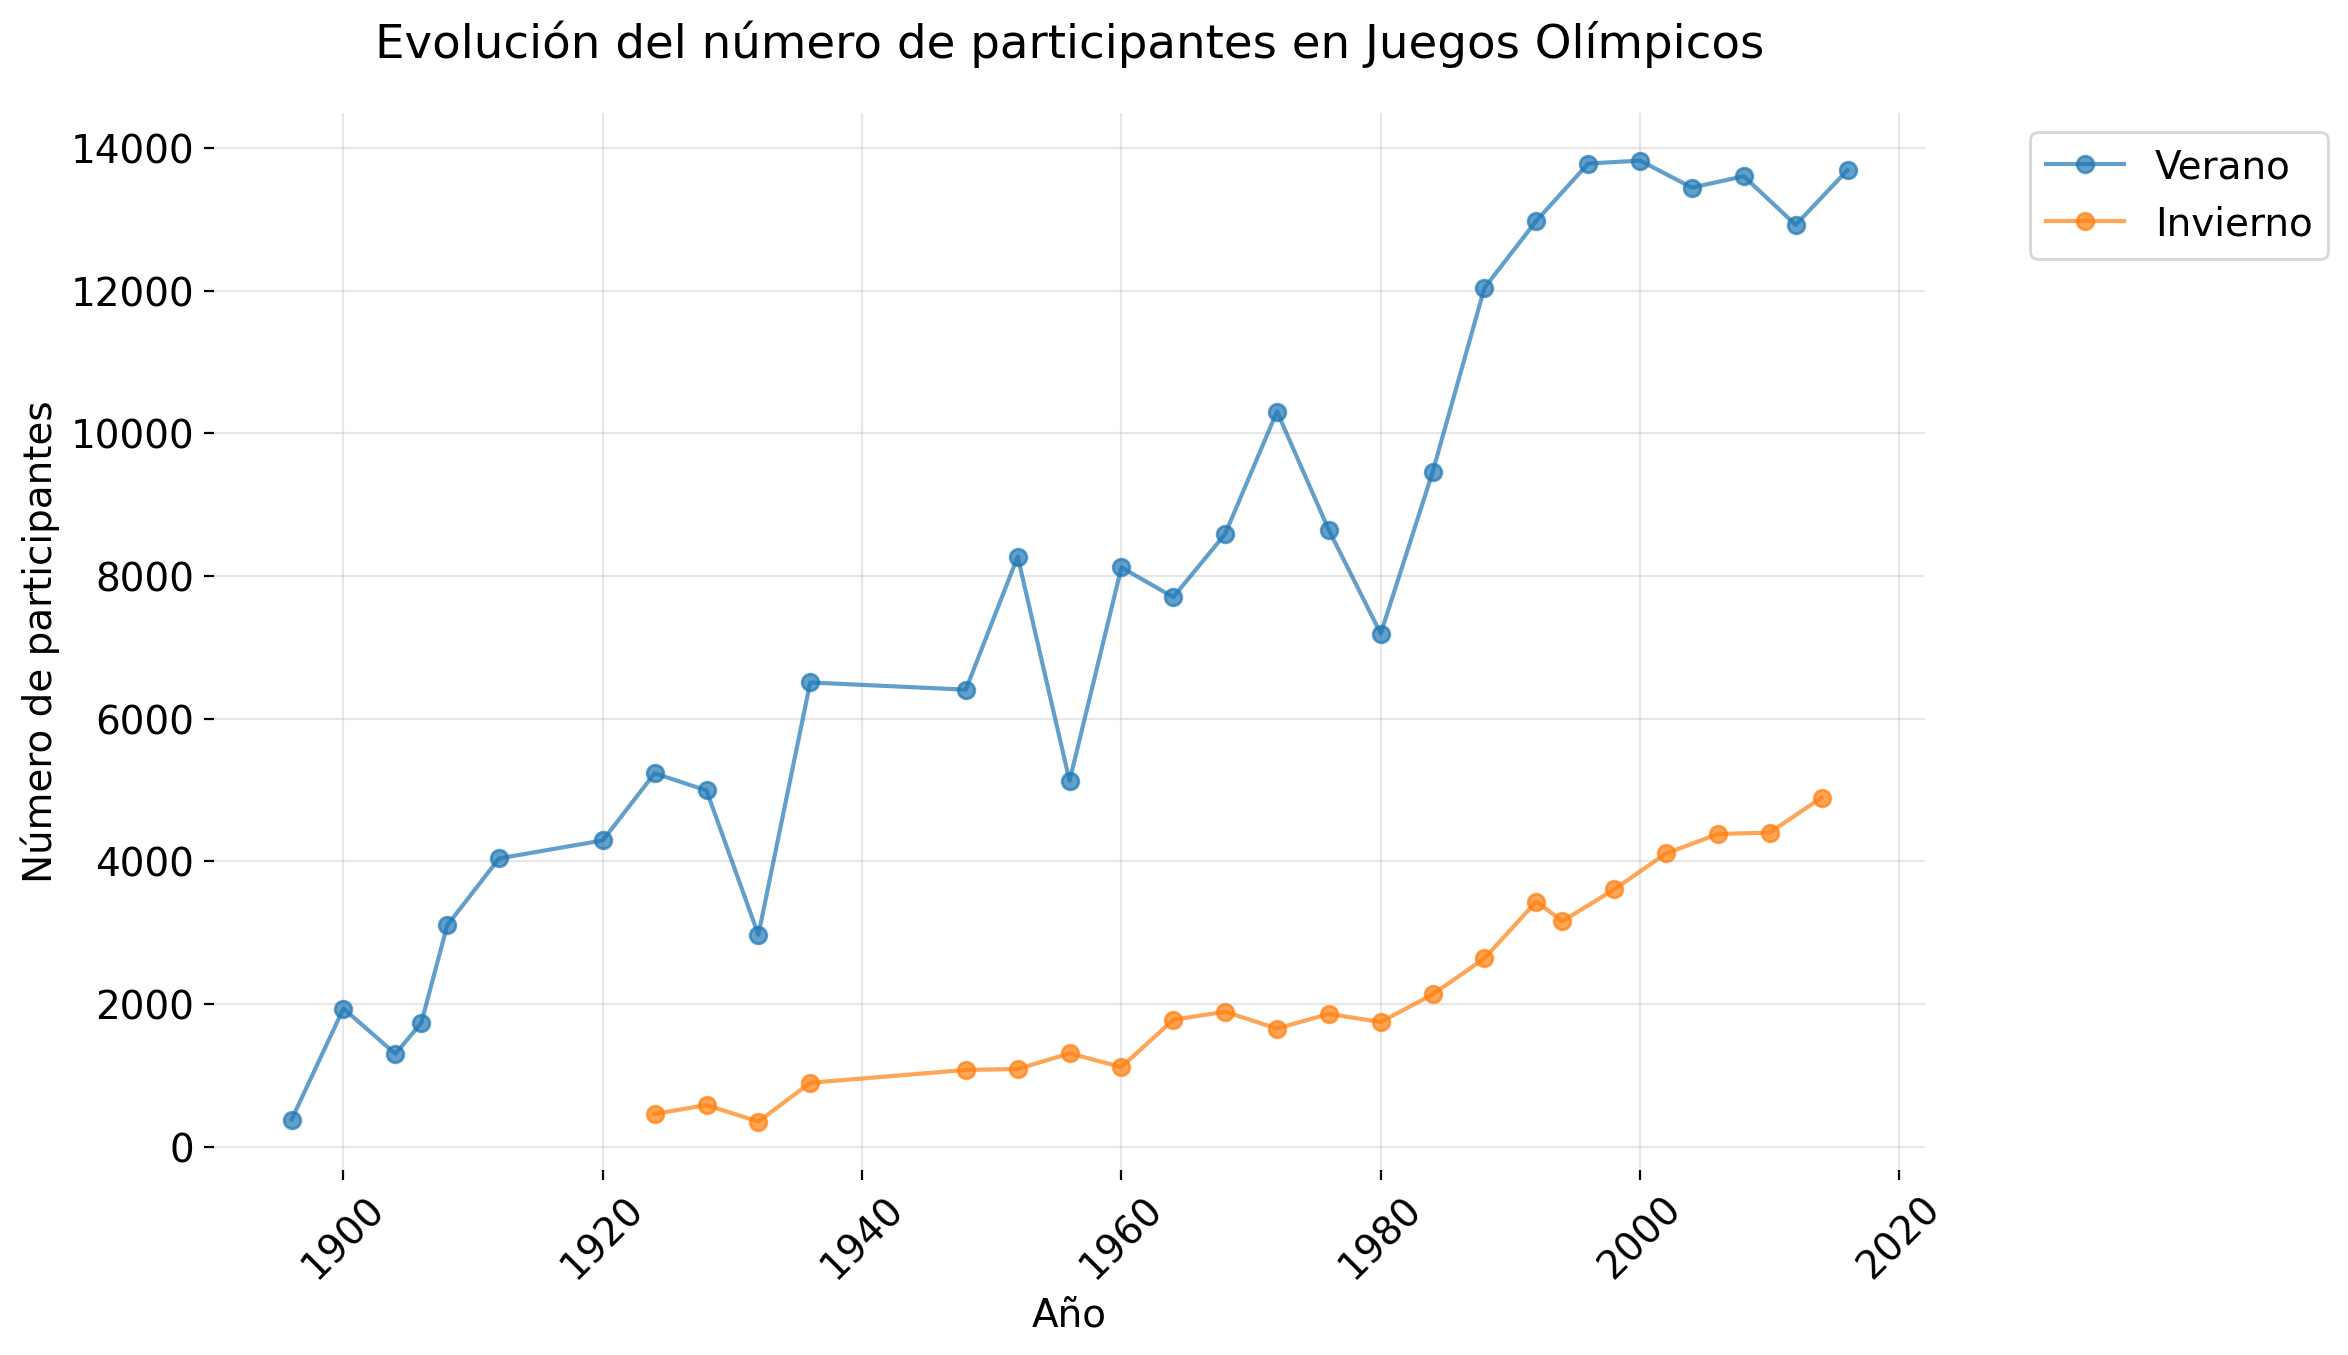

In [122]:
fig, ax = plt.subplots(figsize=(12, 7))

summer = participants_by_year[participants_by_year['Season'] == 'Summer']
winter = participants_by_year[participants_by_year['Season'] == 'Winter']

ax.plot(summer['Year'], summer['Participants'], 
        marker='o', label='Verano', alpha=0.7)
ax.plot(winter['Year'], winter['Participants'], 
        marker='o', label='Invierno', alpha=0.7)

ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xlabel('Año')
ax.set_ylabel('Número de participantes')
ax.set_title('Evolución del número de participantes en Juegos Olímpicos', pad=20)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)

plt.tight_layout()

# Ejercicio 5
Cuántas medallas de cada tipo (oro, plata y bronce) se suelen llevar los españoles en los juegos olímpicos de verano.

In [123]:
spain_medals = athlete_df.loc[
    (athlete_df.Team == "Spain") &
    (athlete_df.Season == "Summer") &
    (athlete_df.Medal.notna())
]

medals_by_type = spain_medals.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

medals_by_type

Medal,Bronze,Gold,Silver
Year,,,
1900,0,2,0
1920,0,0,23
1928,0,3,0
1932,1,0,0
1948,0,0,3
1952,0,0,1
1960,14,0,0
1972,1,0,0
1976,0,0,6


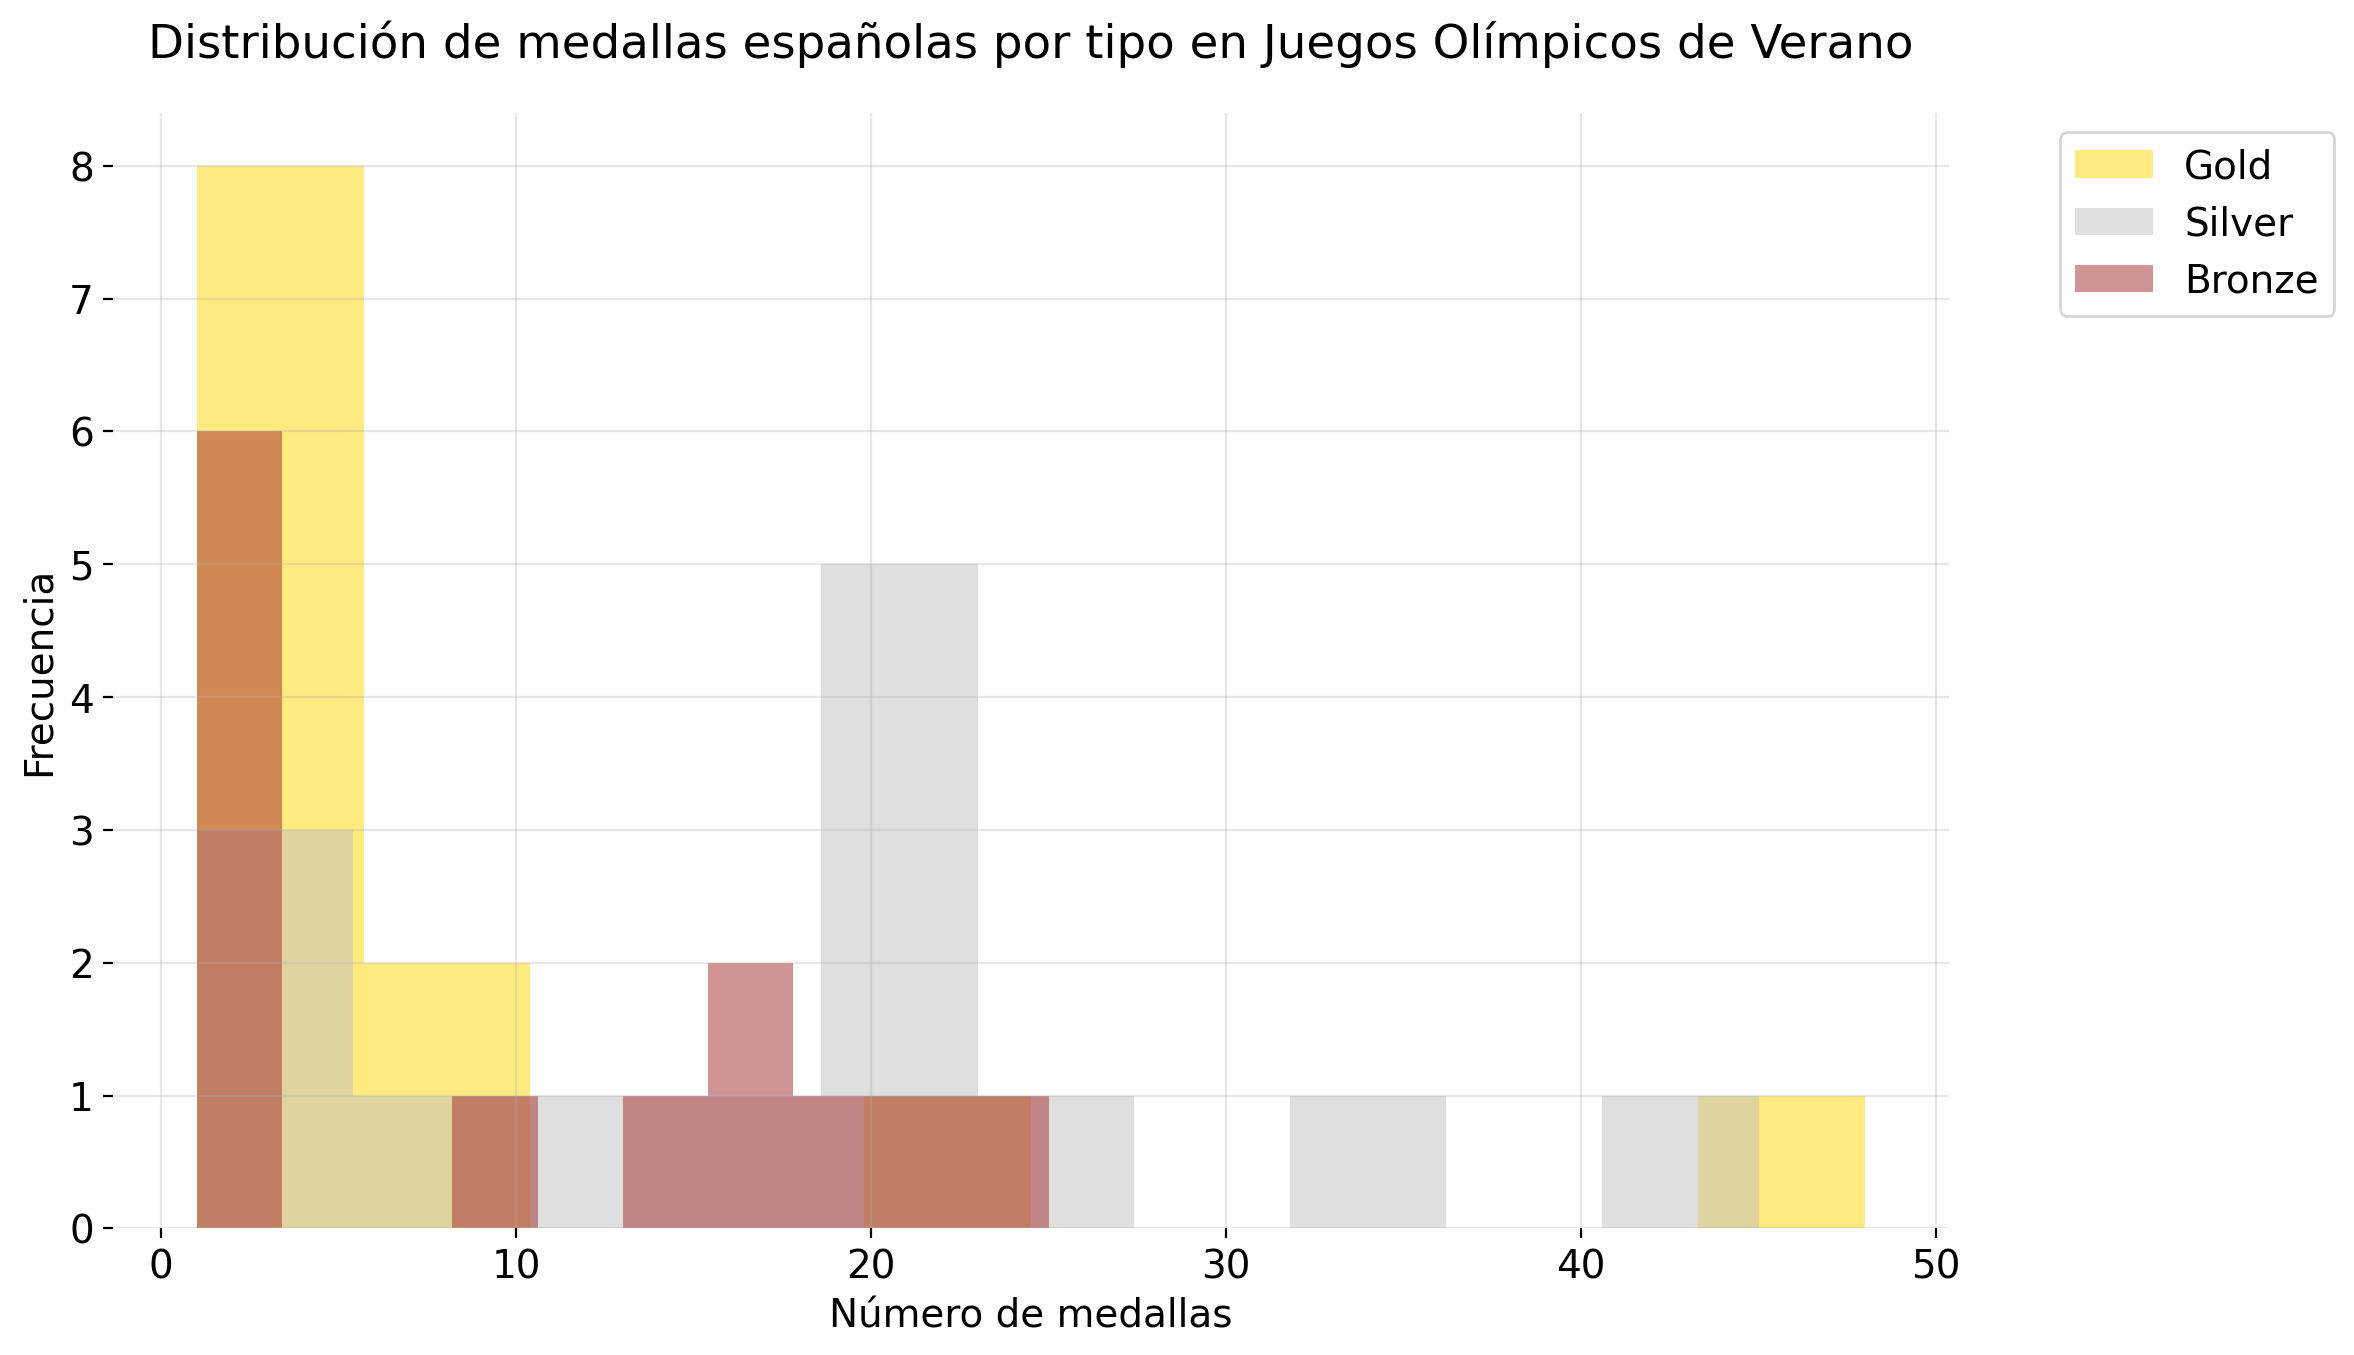

In [124]:
fig, ax = plt.subplots(figsize=(12, 7))

# Para cada tipo de medalla
for medal, color in zip(['Gold', 'Silver', 'Bronze'], ['gold', 'silver', 'brown']):
    # Filtramos por tipo de medalla
    medal_data = spain_medals[spain_medals.Medal == medal].groupby('Year').size()
    
    # histograma
    ax.hist(medal_data.values, bins=10, alpha=0.5, color=color, label=medal)

ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xlabel('Número de medallas')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de medallas españolas por tipo en Juegos Olímpicos de Verano', pad=20)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()